# In Class Assignment 5 - ME 364 (Spring 2022)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler  # For normalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

<font color='red'>__Question (1)__</font>: Using the Fuel Economy data set that we used in the class, develop a model using `Cmb MPG` and `Air Pollution Score` as features and `Fuel` as the target variable. Make sure to normalize your features.


Split the data into train and test sets, create KNN classifier and train it on the training data, and finally make predictions on both training and test data. Feel free to play around with the distance option and the k value.

In [3]:
url = ('https://raw.githubusercontent.com/MasoudMiM/ME_364/main/EPA_Green_Vehicle_Guide/EPA_2020_Fuel_Economy.csv')
df = pd.read_csv(url)           

df.drop(columns='Unnamed: 0', inplace=True)
df.isnull().sum().sum()

0

Target variable distribution:
Gasoline    2268
Diesel        40
Name: Fuel, dtype: int64


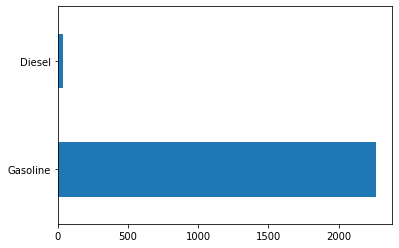

In [6]:
x_data=np.array(df[['Cmb MPG','Air Pollution Score']])   
y_data=df['Fuel']  
df['Fuel'].unique()
print('Target variable distribution:')
print( df['Fuel'].value_counts() )

df['Fuel'].value_counts().plot(kind='barh') #result is very uneven

In [8]:
MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data 
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
neigh.fit(x_train,y_train) 
yhatTest = neigh.predict(x_test)
yhatTrain= neigh.predict(x_train)

<font color='red'>__Question (2)__</font>: For the model you developed, calculate Jaccard index, F-score, and also plot the confusion matrix.

Write a for loop to evaluate the performance of the model for different values of k and see if you can find a better k value for your KNN classifier (aside from k=1).

In [11]:
J_scoreTrain = jaccard_score(y_train,yhatTrain, average='micro')
J_scoreTest = jaccard_score(y_test,yhatTest, average='micro')
print(f'Jaccard index for training data is {J_scoreTrain:0.3f} and Jaccard index for test data is {J_scoreTest:.3f}')

F_scoreTrain = f1_score(y_train,yhatTrain, average='micro')
F_scoreTest = f1_score(y_test,yhatTest, average='micro')
print(F_scoreTrain,F_scoreTest)

Jaccard index for training data is 0.979 and Jaccard index for test data is 0.966
0.9891657638136512 0.9826839826839827


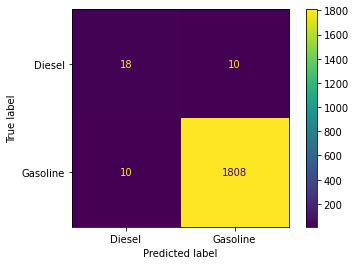

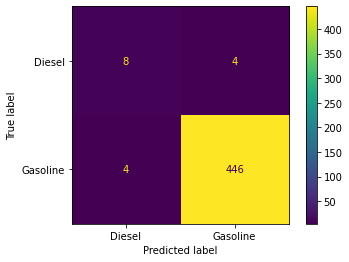

In [12]:
CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   # possible option normalize='true'
CM_scoreTest = confusion_matrix(y_test,yhatTest)   # possible option normalize='true'

dispTr = ConfusionMatrixDisplay(CM_scoreTrain,display_labels=neigh.classes_)
dispTr.plot()

dispTs = ConfusionMatrixDisplay(CM_scoreTest,display_labels=neigh.classes_)
dispTs.plot()

In [9]:
Ks = 25
Jacc_Test = np.zeros((Ks-1))
Jacc_Train= np.zeros((Ks-1))

F_Loop_Test = np.zeros((Ks-1))
F_Loop_Train= np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neighLoop = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatTestLoop  = neighLoop.predict(x_test)
    yhatTrainLoop = neighLoop.predict(x_train)
    Jacc_Test[n-1] = jaccard_score(y_test, yhatTestLoop, average='micro')
    Jacc_Train[n-1] = jaccard_score(y_train, yhatTrainLoop, average='micro')

    F_Loop_Test[n-1] = f1_score(y_test, yhatTestLoop, average='micro')
    F_Loop_Train[n-1] = f1_score(y_train, yhatTrainLoop, average='micro')

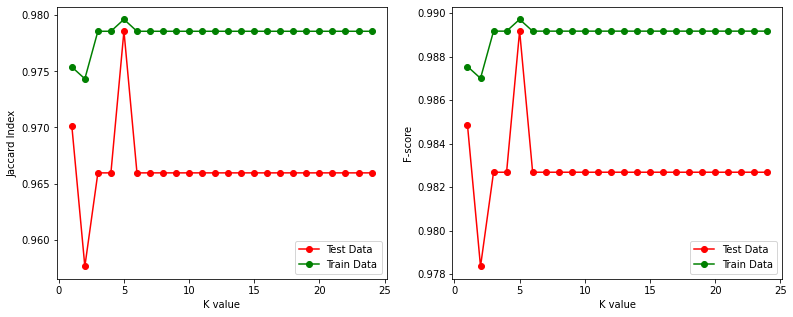

In [10]:

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(range(1,Ks),Jacc_Test,'r-o',range(1,Ks),Jacc_Train,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Jaccard Index');

plt.subplot(1,2,2)
plt.plot(range(1,Ks),F_Loop_Test,'r-o',range(1,Ks),F_Loop_Train,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('F-score');